In [48]:
!pip3 install plot_yar

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# from scipy.optimize import curve_fit
from plot_yar.plot import plot_approx

plt.rc('font', size=16)
plt.rc('legend', fontsize=12)

In [63]:
data = pd.read_excel('22.xlsx')
data.head()

,Tаблица 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Мощность излучения от мощности накачки,Current A,Power Wt,V micro,NaN,Источник,Детектор
1,NaN,12,1.050E-01,960,5.164E+01,9.000E-02,6.100E-03
2,NaN,1.175E+01,2.850E-02,940,1.402E+01,NaN,NaN
3,NaN,1.220E+01,4.700E-01,976,2.311E+02,30,9.000E-02
4,NaN,1.240E+01,4.700E-01,992,2.311E+02,100,3.000E-01


## №1 Мощность излучения от мощности накачки

In [61]:
x = np.array(data[1:8]['Unnamed: 3'])
y = np.array(data[1:8]['Unnamed: 4'])
xy = dict(sorted(list(zip(x,y)), key=lambda i: i[0]))
x = np.array(list(xy.keys()))
y = np.array(list(xy.values()))

Coeffs table 0: 

  coeffs  coeffs_values  standard error  relative se, %
0    a_0      5.030E+00       1.707E-01       3.394E+00
1    a_1     -4.732E+03       1.680E+05       3.550E+03

Standart_error_Y_0 = 3.037E+01


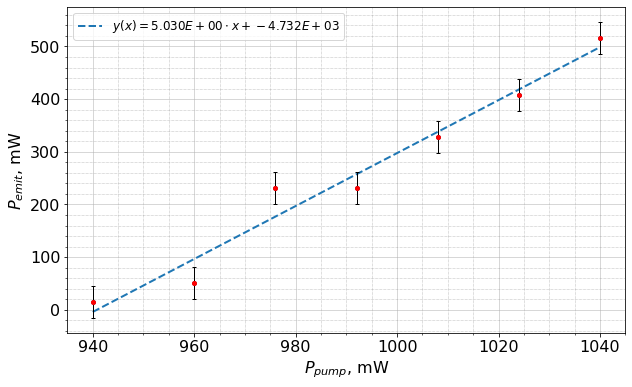

In [62]:
plot_approx(
    [x], [y],
    'linear',
    plot_title='',
    x_label=r'$P_{pump}$, mW', y_label=r'$P_{emit}$, mW',
    save_fig=True,
    plot_name='P_P'
)

## №2 Мощность 2й гармоники от мощности накачки

In [54]:
x = np.array(data[9:16]['Unnamed: 3'])
y = np.array(data[9:16]['Unnamed: 4'])
xy = dict(sorted(list(zip(x,y)), key=lambda i: i[0]))
x = np.array(list(xy.keys()))
y = np.array(list(xy.values()))

Coeffs table 0: 

  coeffs  coeffs_values  standard error  relative se, %
0    a_0     -1.117E-06       1.287E-11       1.152E-03
1    a_1      3.305E-03       1.480E-04       4.479E+00
2    a_2     -3.127E+00       1.883E+02       6.022E+03
3    a_3      9.399E+02       2.650E+07       2.820E+06

Standart_error_Y_0 = 1.628E+00


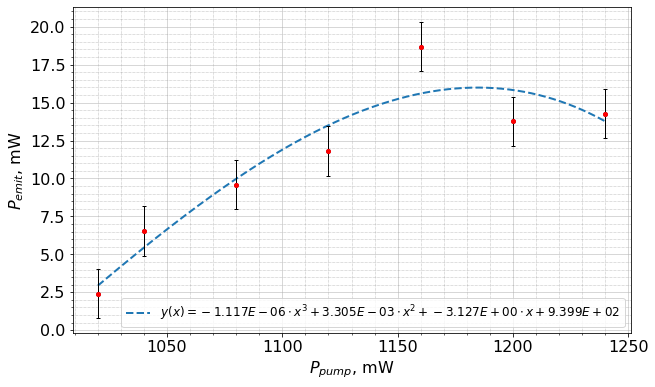

In [60]:
plot_approx(
    [x], [y],
    'poly_3',
    plot_title='',
    x_label=r'$P_{pump}$, mW', y_label=r'$P_{emit}$, mW',
    save_fig=True,
    plot_name='P2_P'
)

## №3 Выходная энергия 2й гармоники от угла поворота

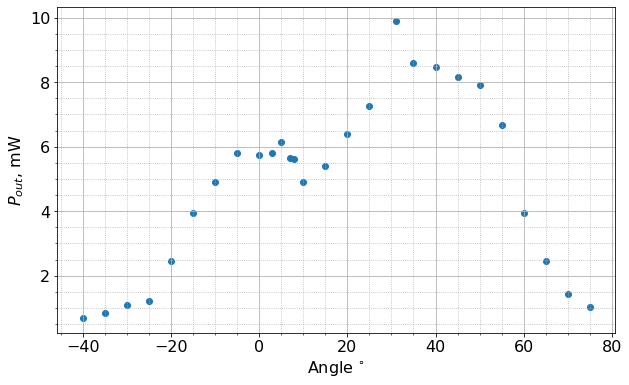

In [70]:
x = np.array(data[16:]['Unnamed: 1'])
y = np.array(data[16:]['Unnamed: 4'])
xy = dict(sorted(list(zip(x,y)), key=lambda i: i[0]))
x = np.array(list(xy.keys()))
y = np.array(list(xy.values()))

plt.figure(figsize=(10,6))

plt.scatter(x, y)

plt.ylabel(r'$P_{out}$, mW')
plt.xlabel(r'Angle $^{\circ}$')

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.grid()

plt.savefig('pictures/P_A.png', dpi=400)
plt.show()